#### Q1. Import the data file "brexit_tweet_count_by_data.csv" into a Pandas DataFrame object. Pivot the data so that each date is on a single row and with separate columns for tweets and retweets.

In [1]:
### your code here
import pandas as pd
tweet_data = pd.read_csv("brexit_tweet_count_by_data.csv")
tweet_data.head()

pivot_tweet = tweet_data.pivot_table(values = 'total_count', index = 'date', columns = 'retweet')
pivot_tweet.columns = ['tweets', 'retweets']
pivot_tweet.head()



,tweets,retweets
date,,
2016-01-06,699,1942
2016-01-07,3511,4811
2016-01-08,2401,4752
2016-01-09,1620,4193
2016-01-10,2744,5038


#### Q2. Import the data files in the directory BBData using read_csv. Clean them, removing missing and irrelevant data, and join them together. Then create a single line plot showing all of the series (see `plot.PNG` in this repository). Your plot should have a title and a legend correctly labeling  the series. You may find it easier to start this exercise by just importing a single file to clean the data and only then iterating through all of them.

#### Hint 1: you might consider using the code below (or write your own code)
#### Hint 2: use `DataFrame.apply(pandas.to_numeric)` to transform all elements in a dataframe into numeric values
#### Hint 3: specify the `figsize` argument in the `plot` function to adjust the figure size, if you find the x-axis label looks poorly

<Axes: title={'center': 'Term structure of interest rates on listed Federal securities (method by Svensson)'}>

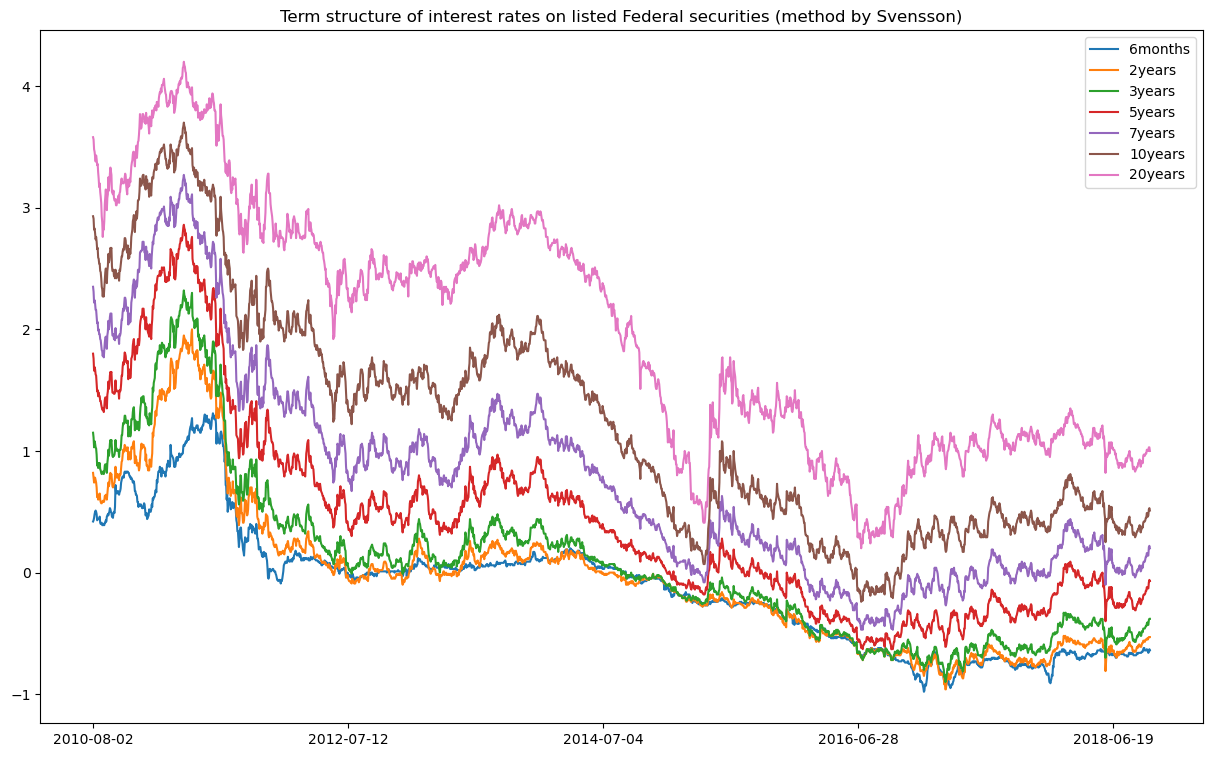

In [ ]:
import pandas as pd
datafile = list(map(lambda x: 'BBData/'+ str(x) + 'years.csv', [2,3,5,7,10,20]))
datafile.insert(0, 'BBData/6months.csv')
columnname = list(map(lambda x: str(x)+'years', [2,3,5,7,10,20]))
columnname.insert(0, '6months')
for i,(name,file) in enumerate(zip(columnname, datafile)):
    df0 = pd.read_csv(file, index_col=0, header=[0, 0])   
    df0.columns = [name, 'B']  
    df0 = pd.DataFrame(df0[name][3:]) 
    df0 = df0[df0!='.'] 
    
    if i == 0:
        df = df0
    else:
        df = df.join(df0)

df = df.dropna()
df = df.apply(pd.to_numeric)
t = 'Term structure of interest rates on listed Federal securities (method by Svensson)'
df.plot(figsize=(15, 9), title= t)
